## Compile Results tables and Plot

In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Original Bias Evaluation

In [4]:
df = pd.read_csv('results_tables/eval_manual_threshold_1.csv').iloc[:,1:]

#### add protected_attribute column

In [7]:
df.insert(1, "protected_attribute", ['sex', 'age', 'race-binary', 'sex', 'age', 'race-binary','sex', 'age', 'race-binary'], True)

In [9]:
df.to_csv('results_tables/eval_manual_threshold_1.csv')

In [10]:
df = pd.read_csv('results_tables/eval_manual_threshold_1.csv').iloc[:,1:]


In [13]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid', stralign="center", numalign="center"))

╒════╤═════════╤═══════════════════════╤═════════════╤═══════════════╤═══════════════╤═════════════════════╤═══════════════════════╤════════════════════╤═════════════════════════════════╤════════════════════════════════╤═══════════════╕
│    │  model  │  protected_attribute  │  threshold  │  sensitivity  │  specificity  │  Balanced Accuracy  │  Avg Odds Difference  │  Disparate Impact  │  Statistical Parity Difference  │  Equal Opportunity Difference  │  Theil Index  │
╞════╪═════════╪═══════════════════════╪═════════════╪═══════════════╪═══════════════╪═════════════════════╪═══════════════════════╪════════════════════╪═════════════════════════════════╪════════════════════════════════╪═══════════════╡
│ 0  │   MLP   │          sex          │  0.500408   │   0.681125    │   0.670772    │      0.675949       │       -0.27701        │      0.449364      │            -0.28447             │           -0.288023            │   0.087927    │
├────┼─────────┼───────────────────────┼────────────

### Combine Post-processing Results into single dataframe (MLP_all_postprocessing_results.csv)

In [10]:
df2 = pd.read_csv('results_tables/MIT_postprocessing/MLP_ROC_SPD_results.csv').iloc[:,1:]
df2

,model,protected_attribute,intervention,threshold,optimal ROC margin,sensitivity,specificity,Balanced Accuracy,Avg Odds Difference,Disparate Impact,Statistical Parity Difference,Equal Opportunity Difference,Theil Index
0,MLP,sex,ROC-SPD,0.4951,0.0606,0.6923,0.6719,0.6821,-0.0583,0.8232,-0.0708,-0.0664,0.0867
1,MLP,race,ROC-SPD,0.5148,0.0099,0.6853,0.6987,0.6920,-0.0642,0.7301,-0.0708,-0.0921,0.0857
2,MLP,age,ROC-SPD,0.4357,0.1156,0.6662,0.6717,0.6689,-0.0864,0.7682,-0.0708,-0.0882,-0.1117


In [11]:
df3 = pd.read_csv('results_tables/MIT_postprocessing/MLP_ROC_EO_results.csv').iloc[:,1:]
df3

,model,protected_attribute,intervention,threshold,optimal ROC margin,sensitivity,specificity,Balanced Accuracy,Avg Odds Difference,Disparate Impact,Statistical Parity Difference,Equal Opportunity Difference,Theil Index
0,MLP,sex,ROC-EO,0.5148,0.0594,0.6745,0.6949,0.6847,-0.0782,0.7738,-0.0874,-0.0898,0.0870
1,MLP,race,ROC-EO,0.4852,0.0000,0.6967,0.6867,0.6917,-0.0822,0.6920,-0.1090,-0.0700,0.0851
2,MLP,age,ROC-EO,0.4357,0.1245,0.6013,0.7312,0.6663,-0.0737,0.7676,-0.0737,-0.1005,-0.0918


In [13]:
df4 = pd.concat([df2, df3], axis=0)
df4.to_csv('results_tables/MIT_postprocessing/MLP_ROC_ALL_results.csv')

In [15]:
df5 = pd.concat([df1.drop(['accuracy'], axis=1), df4.drop(['optimal ROC margin'], axis=1)])

In [17]:
df5.to_csv('results_tables/MIT_postprocessing/MLP_all_postprocessing_results.csv')

In [19]:
df5.protected_attribute[df5.protected_attribute == 'race'] = 'race-binary'

C:\Users\anali\AppData\Local\Temp/ipykernel_2504/2224140058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.protected_attribute[df5.protected_attribute == 'race'] = 'race-binary'


## All Bias Mitigation Post-processing Results
***

In [10]:
df5.to_csv('results_tables/MIT_postprocessing/MLP_all_postprocessing_results.csv')
df5

,model,protected_attribute,intervention,threshold,specificity,sensitivity,Balanced Accuracy,Avg Odds Difference,Disparate Impact,Statistical Parity Difference,Equal Opportunity Difference,Theil Index
0,MLP,sex,original,0.6000,0.559695,0.792449,0.676072,-0.266829,0.354377,-0.238537,-0.320832,0.089320
1,MLP,sex,calibrated eq odds,0.6000,0.454858,0.829446,0.642152,-0.136572,0.476532,-0.143827,-0.143959,0.094388
2,MLP,race-binary,original,0.6000,0.546067,0.810832,0.678450,-0.084392,0.613716,-0.087521,-0.097744,0.088292
3,MLP,race-binary,calibrated eq odds,0.6000,0.491500,0.830386,0.660943,-0.045892,0.686631,-0.063461,-0.041469,0.090730
4,MLP,age-binary,original,0.6000,0.492994,0.836335,0.664665,-0.293140,0.080419,-0.228473,-0.387980,0.089875
5,MLP,age-binary,calibrated eq odds,0.6000,0.266586,0.910477,0.588531,-0.118991,0.150572,-0.112716,-0.138991,0.097458
6,MLP,sex,ROC-SPD,0.4951,0.692300,0.671900,0.682100,-0.058300,0.823200,-0.070800,-0.066400,0.086700
7,MLP,race-binary,ROC-SPD,0.5148,0.685300,0.698700,0.692000,-0.064200,0.730100,-0.070800,-0.092100,0.085700
8,MLP,age,ROC-SPD,0.4357,0.666200,0.671700,0.668900,-0.086400,0.768200,-0.070800,-0.088200,-0.111700
9,MLP,sex,ROC-EO,0.5148,0.674500,0.694900,0.684700,-0.078200,0.773800,-0.087400,-0.089800,0.087000


In [144]:
df5.protected_attribute[df5.protected_attribute == 'age'] = 'age-binary'

C:\Users\anali\AppData\Local\Temp/ipykernel_2504/1361294403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.protected_attribute[df5.protected_attribute == 'age'] = 'age-binary'


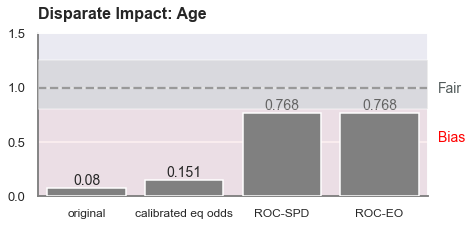

In [147]:
# plt.subplot(1,2,1)
df = df5[df5['protected_attribute'] == 'age-binary']
df = df.round(decimals = 3)
sns.set(context='talk', style='darkgrid')

plt.figure(figsize=(7,3))
ax = sns.barplot(x='intervention', y='Disparate Impact', data=df, color='grey', zorder=15)
plt.ylim((0, 1.5))
# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_position(('data',0))
ax.text(3.6, 0.5, 'Bias', color='red', fontsize=14)
ax.text(3.6, 0.95, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(fontsize=12)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax.axhline(1, color='grey', linestyle='--')
plt.axhspan(0, 0.8, facecolor='red', alpha=0.05)
plt.axhspan(0.8, 1.25, facecolor='#C0C0C0', alpha=0.4, zorder=5)
plt.title('Disparate Impact: Age', loc='left', y=1.05, fontsize=16, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, fontsize=14)

#### put table into long form to plot with seaborn (all fairness metrics in one column)

In [114]:
df = pd.melt(df5, id_vars= ['protected_attribute', 'intervention'], value_vars=['Avg Odds Difference', 'Statistical Parity Difference', 'Equal Opportunity Difference', 'Theil Index'])
df = df.round(decimals = 3)

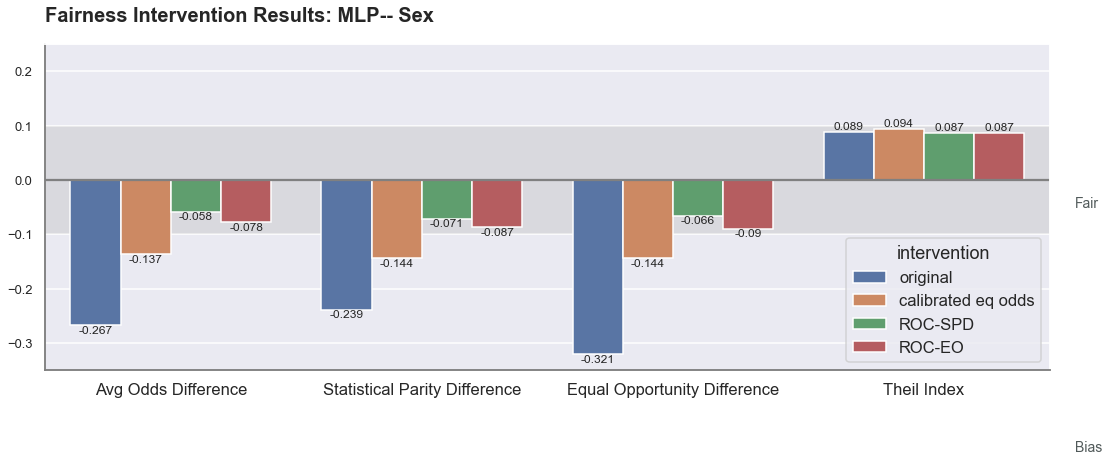

In [106]:
# plt.subplot(1, 2, 2)
plt.figure(figsize=(18,6))

df_new = df[df.protected_attribute == 'sex']

ax1 = sns.barplot(x='variable', y='value', data=df_new, hue='intervention', ci=None, zorder=2)
plt.ylim((-0.35, 0.25))
ax1.axhline(0, color='grey')

# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
# ax1.spines['bottom'].set_position(('data',0))
ax1.text(3.6, -0.5, 'Bias', color='#515A5A', fontsize=14)
ax1.text(3.6, -0.05, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.axhspan(-0.1, 0.1, facecolor='#C0C0C0', alpha=0.4, zorder=1)
# plt.axhspan(-1, -0.1, facecolor='red', alpha=0.04)
plt.title('Fairness Intervention Results: MLP-- Sex', loc='left', y=1.05, fontsize=20, fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=12)

In [115]:
df.protected_attribute[df.protected_attribute == 'age'] = 'age-binary'

C:\Users\anali\AppData\Local\Temp/ipykernel_2504/852947559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.protected_attribute[df.protected_attribute == 'age'] = 'age-binary'


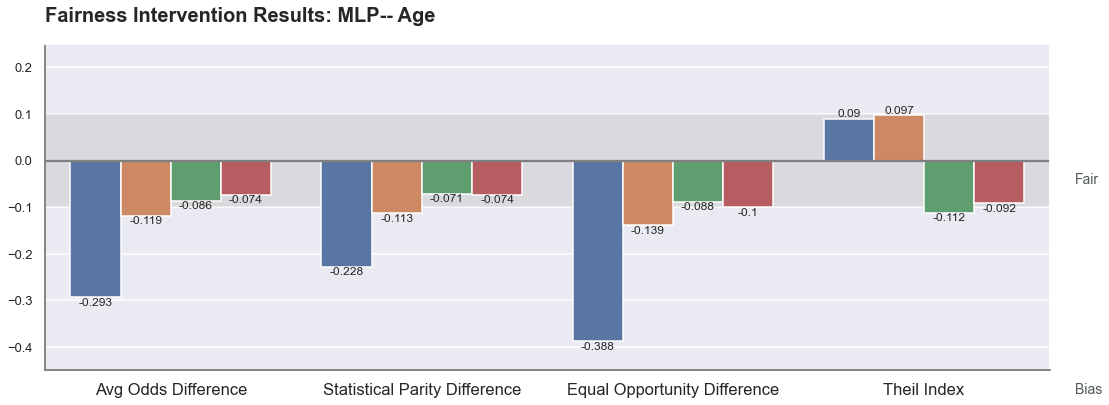

In [128]:
plt.figure(figsize=(18,6))


ax1 = sns.barplot(x='variable', y='value', data=df[df.protected_attribute == 'age-binary'], hue='intervention', ci=None, zorder=2)
plt.ylim((-0.45, 0.25))
ax1.axhline(0, color='grey')

# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
# ax1.spines['bottom'].set_position(('data',0))
ax1.text(3.6, -0.5, 'Bias', color='#515A5A', fontsize=14)
ax1.text(3.6, -0.05, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.axhspan(-0.1, 0.1, facecolor='#C0C0C0', alpha=0.4, zorder=1)
# plt.axhspan(-1, -0.1, facecolor='red', alpha=0.04)
plt.legend([],[], frameon=False)
plt.title('Fairness Intervention Results: MLP-- Age', loc='left', y=1.05, fontsize=20, fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=12)

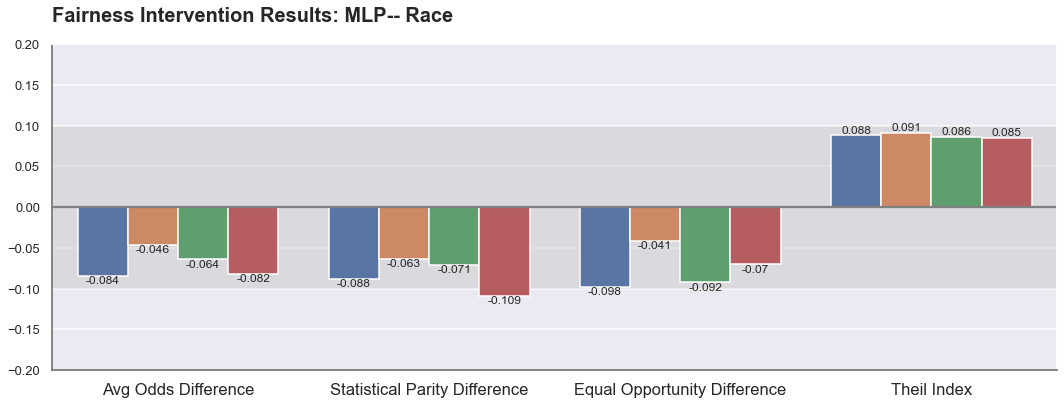

In [129]:
plt.figure(figsize=(18,6))


ax1 = sns.barplot(x='variable', y='value', data=df[df.protected_attribute == 'race-binary'], hue='intervention', ci=None, zorder=2)
plt.ylim((-0.2, 0.2))
ax1.axhline(0, color='grey')

# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
# ax1.spines['bottom'].set_position(('data',0))
# ax1.text(3.6, -0.5, 'Bias', color='#515A5A', fontsize=14)
# ax1.text(3.6, -0.05, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.axhspan(-0.1, 0.1, facecolor='#C0C0C0', alpha=0.4, zorder=1)
# plt.axhspan(-1, -0.1, facecolor='red', alpha=0.04)
plt.legend([],[], frameon=False)
plt.title('Fairness Intervention Results: MLP-- Race', loc='left', y=1.05, fontsize=20, fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=12)

## All Bias Mitigation Preprocessing Results
***

In [193]:
df = pd.read_csv('results_tables/MIT_preprocessing/DI_Reweigh_1_0.csv').iloc[:,1:]
df

,model,protected_attribute,intervention,accuracy,threshold,sensitivity,specificity,Balanced Accuracy,Avg Odds Difference,Disparate Impact,Statistical Parity Difference,Equal Opportunity Difference,Theil Index
0,XGBoost,sex,original,0.725693,0.609388,0.381361,0.877675,0.629518,-0.273973,0.217082,-0.199587,-0.379724,0.093764
1,XGBoost,sex,DI Remover,0.787436,0.609388,0.608281,0.815090,0.711685,-0.185759,0.456819,-0.172538,-0.227281,0.081702
2,XGBoost,race-binary,original,0.725693,0.609388,0.381361,0.877675,0.629518,-0.099048,0.575210,-0.063609,-0.151366,0.093764
3,XGBoost,race-binary,DI Remover,0.787436,0.609388,0.622675,0.771693,0.697184,-0.027141,0.799336,-0.053658,-0.016385,0.085797
4,XGBoost,age-binary,original,0.725693,0.609388,0.381361,0.877675,0.629518,-0.169427,0.220901,-0.140174,-0.220871,0.093764
5,XGBoost,age-binary,DI Remover,0.787436,0.609388,0.622675,0.771693,0.697184,-0.369648,0.084848,-0.309977,-0.463427,0.085797
6,XGBoost,sex,Reweighing,0.789506,0.609388,0.596521,0.817981,0.707251,-0.215947,0.399985,-0.196373,-0.264978,0.082781
7,XGBoost,race-binary,Reweighing,0.789506,0.609388,0.596521,0.817981,0.707251,-0.085566,0.543005,-0.103267,-0.086228,0.082781
8,XGBoost,age-binary,Reweighing,0.789506,0.609388,0.596521,0.817981,0.707251,-0.312744,0.092440,-0.255648,-0.405937,0.082781


In [196]:
df = pd.melt(df, id_vars= ['protected_attribute', 'intervention'], value_vars=['Disparate Impact','Avg Odds Difference', 'Statistical Parity Difference', 'Equal Opportunity Difference', 'Theil Index'])
df = df.round(decimals = 3)

In [197]:
df1 = df[df['variable'] == 'Disparate Impact']
df1

,protected_attribute,intervention,variable,value
0,sex,original,Disparate Impact,0.217
1,sex,DI Remover,Disparate Impact,0.457
2,race-binary,original,Disparate Impact,0.575
3,race-binary,DI Remover,Disparate Impact,0.799
4,age-binary,original,Disparate Impact,0.221
5,age-binary,DI Remover,Disparate Impact,0.085
6,sex,Reweighing,Disparate Impact,0.400
7,race-binary,Reweighing,Disparate Impact,0.543
8,age-binary,Reweighing,Disparate Impact,0.092


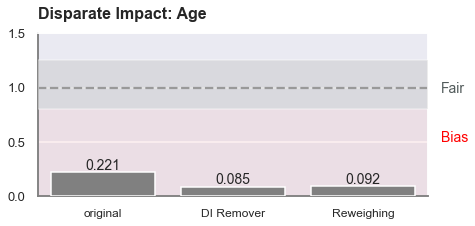

In [198]:
# plt.subplot(1,2,1)
df1 = df[df['variable'] == 'Disparate Impact']
df1 = df1.round(decimals = 3)
sns.set(context='talk', style='darkgrid')

plt.figure(figsize=(7,3))
ax = sns.barplot(x='intervention', y='value', data=df1[df1.protected_attribute == 'age-binary'], color='grey', zorder=15)
plt.ylim((0, 1.5))
# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_position(('data',0))
ax.text(2.6, 0.5, 'Bias', color='red', fontsize=14)
ax.text(2.6, 0.95, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(fontsize=12)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax.axhline(1, color='grey', linestyle='--')
plt.axhspan(0, 0.8, facecolor='red', alpha=0.05)
plt.axhspan(0.8, 1.25, facecolor='#C0C0C0', alpha=0.4, zorder=5)
plt.title('Disparate Impact: Age', loc='left', y=1.05, fontsize=16, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, fontsize=14)

In [178]:
df = df[df.variable != 'Disparate Impact']
df

,protected_attribute,intervention,variable,value
9,sex,original,Avg Odds Difference,-0.274
10,sex,DI Remover,Avg Odds Difference,-0.186
11,race-binary,original,Avg Odds Difference,-0.099
12,race-binary,DI Remover,Avg Odds Difference,-0.027
13,age-binary,original,Avg Odds Difference,-0.169
14,age-binary,DI Remover,Avg Odds Difference,-0.370
15,sex,Reweighing,Avg Odds Difference,-0.216
16,race-binary,Reweighing,Avg Odds Difference,-0.086
17,age-binary,Reweighing,Avg Odds Difference,-0.313
18,sex,original,Statistical Parity Difference,-0.200


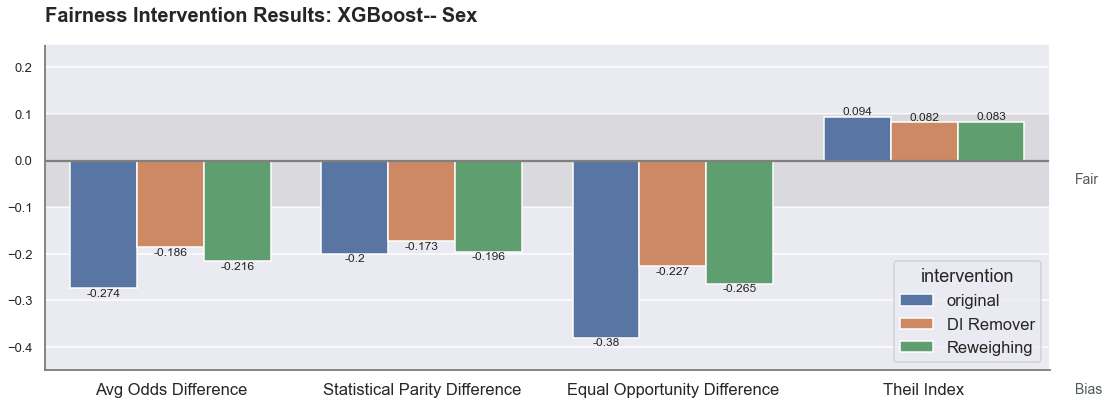

In [183]:
# plt.subplot(1, 2, 2)
plt.figure(figsize=(18,6))

df_new = df[df.protected_attribute == 'sex']

ax1 = sns.barplot(x='variable', y='value', data=df_new, hue='intervention', ci=None, zorder=2)
plt.ylim((-0.45, 0.25))
ax1.axhline(0, color='grey')

# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
# ax1.spines['bottom'].set_position(('data',0))
ax1.text(3.6, -0.5, 'Bias', color='#515A5A', fontsize=14)
ax1.text(3.6, -0.05, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.axhspan(-0.1, 0.1, facecolor='#C0C0C0', alpha=0.4, zorder=1)
# plt.axhspan(-1, -0.1, facecolor='red', alpha=0.04)
plt.title('Fairness Intervention Results: XGBoost-- Sex', loc='left', y=1.05, fontsize=20, fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=12)

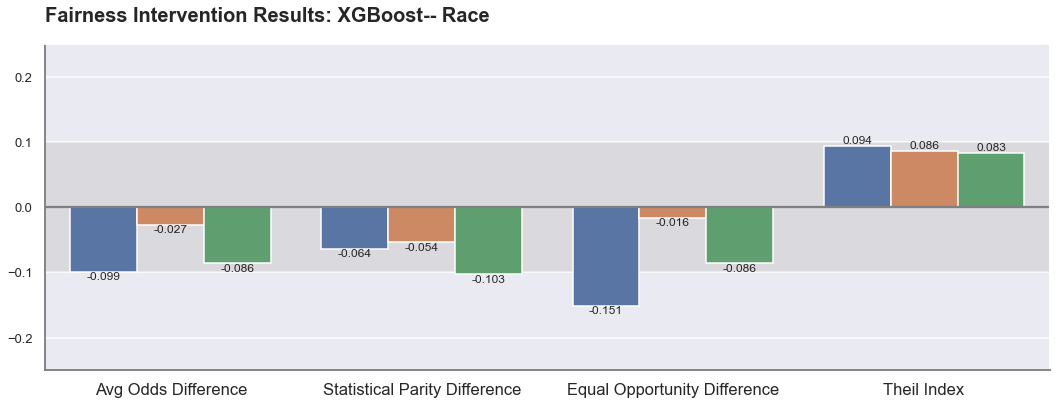

In [187]:
# plt.subplot(1, 2, 2)
plt.figure(figsize=(18,6))

df_new = df[df.protected_attribute == 'race-binary']

ax1 = sns.barplot(x='variable', y='value', data=df_new, hue='intervention', ci=None, zorder=2)
plt.ylim((-0.25, 0.25))
ax1.axhline(0, color='grey')

# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
# ax1.spines['bottom'].set_position(('data',0))
# ax1.text(3.6, -0.5, 'Bias', color='#515A5A', fontsize=14)
# ax1.text(3.6, -0.05, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.axhspan(-0.1, 0.1, facecolor='#C0C0C0', alpha=0.4, zorder=1)
# plt.axhspan(-1, -0.1, facecolor='red', alpha=0.04)
plt.legend([],[], frameon=False)

plt.title('Fairness Intervention Results: XGBoost-- Race', loc='left', y=1.05, fontsize=20, fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=12)

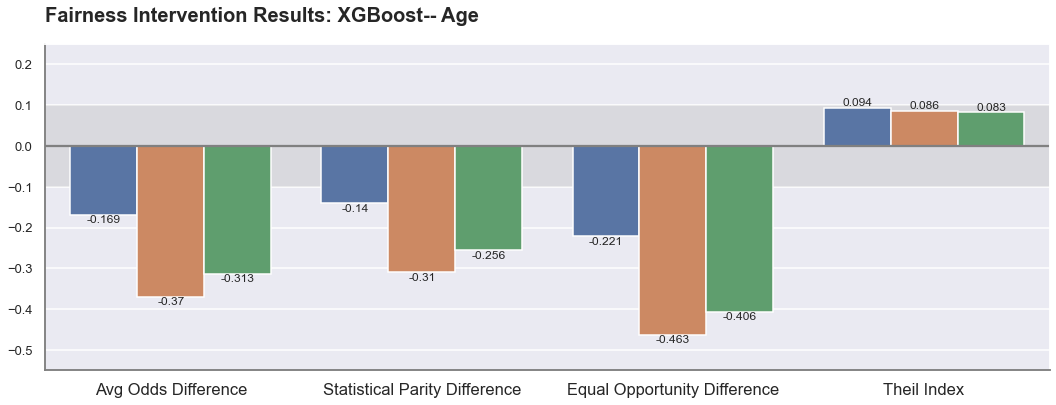

In [190]:
# plt.subplot(1, 2, 2)
plt.figure(figsize=(18,6))

df_new = df[df.protected_attribute == 'age-binary']

ax1 = sns.barplot(x='variable', y='value', data=df_new, hue='intervention', ci=None, zorder=2)
plt.ylim((-0.55, 0.25))
ax1.axhline(0, color='grey')

# plt.xlim((-0.7, 1.5))
plt.xlabel('')
plt.ylabel('')
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
# ax1.spines['bottom'].set_position(('data',0))
# ax1.text(3.6, -0.5, 'Bias', color='#515A5A', fontsize=14)
# ax1.text(3.6, -0.05, 'Fair', color='#515A5A', fontsize=14)
plt.yticks(fontsize=13)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.axhspan(-0.1, 0.1, facecolor='#C0C0C0', alpha=0.4, zorder=1)
# plt.axhspan(-1, -0.1, facecolor='red', alpha=0.04)
plt.legend([],[], frameon=False)

plt.title('Fairness Intervention Results: XGBoost-- Age', loc='left', y=1.05, fontsize=20, fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=12)